In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
red=pd.read_csv('小红书数据.csv')

In [2]:
red

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,0.0,43.0,0.0,B,4.26,2343.870,0
1,200.99,0.0,34.0,0.0,A,0.94,8539.872,0
2,69.98,0.0,16.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4
...,...,...,...,...,...,...,...,...
29447,43.19,NaN,NaN,NaN,C,0.94,545.180,1
29448,62.97,0.0,24.0,0.0,C,3.45,3738.912,1
29449,87.26,NaN,NaN,NaN,C,10.42,1279.530,0
29450,19.99,0.0,27.0,0.0,C,16.87,669.580,3


In [3]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   gender                   17723 non-null  float64
 2   age                      17723 non-null  float64
 3   engaged_last_30          17723 non-null  float64
 4   lifecycle                29452 non-null  object 
 5    days_since_last_order   29452 non-null  float64
 6   previous_order_amount    29452 non-null  float64
 7   3rd_party_stores         29452 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [4]:
red.gender.value_counts()

0.0    12438
1.0     5285
Name: gender, dtype: int64

In [5]:
red.age.value_counts()

20.0    598
31.0    578
19.0    577
16.0    576
17.0    569
35.0    569
29.0    569
21.0    568
34.0    567
44.0    565
30.0    563
43.0    561
24.0    560
25.0    560
26.0    560
15.0    560
42.0    558
38.0    557
37.0    556
23.0    556
33.0    548
32.0    544
28.0    537
18.0    537
22.0    537
39.0    534
40.0    534
27.0    529
36.0    527
45.0    525
41.0    523
14.0    521
Name: age, dtype: int64

In [6]:
red.engaged_last_30.value_counts()

0.0    16428
1.0     1295
Name: engaged_last_30, dtype: int64

In [7]:
red['gender']=red['gender'].fillna('unknown')
red['engaged_last_30']=red['engaged_last_30'].fillna('unknown')
red['age']=red['age'].fillna(method='ffill')

In [8]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   gender                   29452 non-null  object 
 2   age                      29452 non-null  float64
 3   engaged_last_30          29452 non-null  object 
 4   lifecycle                29452 non-null  object 
 5    days_since_last_order   29452 non-null  float64
 6   previous_order_amount    29452 non-null  float64
 7   3rd_party_stores         29452 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
red.describe()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000
mean,397.071515,29.484517,7.711348,2339.254020,2.286059
std,959.755615,9.235994,6.489289,2361.572921,3.538219
min,0.020000,14.000000,0.130000,0.000000,0.000000
25%,74.970000,21.000000,2.190000,773.349500,0.000000
50%,175.980000,30.000000,5.970000,1655.790000,0.000000
75%,498.772500,37.000000,11.740000,3084.796500,3.000000
max,103466.100000,45.000000,23.710000,11597.900000,10.000000


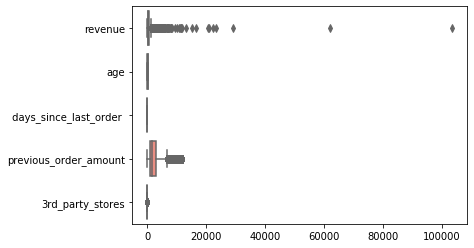

In [10]:
sns.boxplot(data=red,orient='h',palette='Set3')

In [11]:
red.revenue.value_counts()

239.00     830
140.00     408
66.98      342
29.99      297
69.99      283
          ... 
1177.96      1
927.99       1
244.49       1
679.00       1
79.30        1
Name: revenue, Length: 9772, dtype: int64

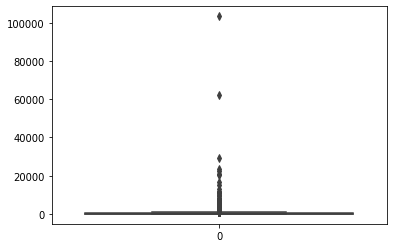

In [12]:
sns.boxplot(data=red.revenue)

In [13]:
red=red[red['revenue']<=8000]

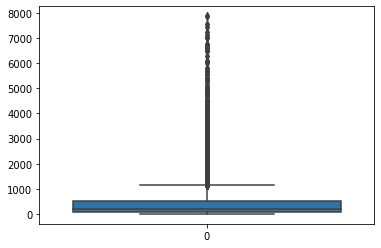

In [14]:
sns.boxplot(data=red.revenue)

In [15]:
red.previous_order_amount.value_counts()

0.000        1939
11297.900     365
11597.900     213
6.990          79
2.950          79
             ... 
3774.044        1
1796.810        1
4308.741        1
1384.770        1
1113.760        1
Name: previous_order_amount, Length: 24215, dtype: int64

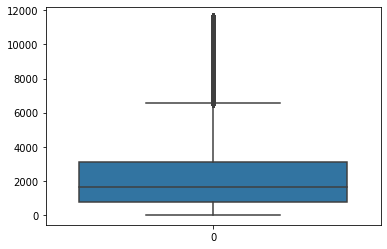

In [16]:
sns.boxplot(data=red.previous_order_amount)

In [17]:
red=red[red['previous_order_amount']<=8000]

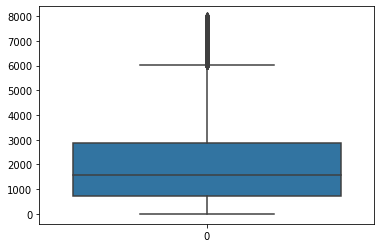

In [18]:
sns.boxplot(data=red.previous_order_amount)

In [19]:
red

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,0,43.0,0,B,4.26,2343.870,0
2,69.98,0,16.0,0,C,4.29,1687.646,1
3,649.99,unknown,16.0,unknown,C,14.90,3498.846,0
4,83.59,unknown,16.0,unknown,C,21.13,3968.490,4
5,319.99,0,15.0,0,C,15.13,2811.491,10
...,...,...,...,...,...,...,...,...
29447,43.19,unknown,30.0,unknown,C,0.94,545.180,1
29448,62.97,0,24.0,0,C,3.45,3738.912,1
29449,87.26,unknown,24.0,unknown,C,10.42,1279.530,0
29450,19.99,0,27.0,0,C,16.87,669.580,3


In [20]:
red.describe()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores
count,28240.000000,28240.000000,28240.000000,28240.000000,28240.000000
mean,365.252994,29.489483,7.802334,1994.512768,2.356586
std,496.808713,9.243010,6.502828,1689.397241,3.575471
min,0.020000,14.000000,0.130000,0.000000,0.000000
25%,71.980000,21.000000,2.260000,742.882500,0.000000
50%,167.185000,30.000000,6.130000,1567.015000,0.000000
75%,479.210000,38.000000,11.870000,2850.686750,3.000000
max,7867.380000,45.000000,23.710000,7995.812000,10.000000


In [21]:
red.age.value_counts()

44.0    961
30.0    930
16.0    923
15.0    922
38.0    920
42.0    919
37.0    915
19.0    911
31.0    908
23.0    900
21.0    900
20.0    900
25.0    899
34.0    894
24.0    889
43.0    887
17.0    884
26.0    880
22.0    877
29.0    872
36.0    863
28.0    859
33.0    858
35.0    854
18.0    849
41.0    848
40.0    844
32.0    844
45.0    842
39.0    840
27.0    833
14.0    815
Name: age, dtype: int64

In [22]:
red.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,0,43.0,0,B,4.26,2343.870,0
2,69.98,0,16.0,0,C,4.29,1687.646,1
3,649.99,unknown,16.0,unknown,C,14.90,3498.846,0
4,83.59,unknown,16.0,unknown,C,21.13,3968.490,4
5,319.99,0,15.0,0,C,15.13,2811.491,10


In [23]:
red=pd.get_dummies(red)

In [24]:
red

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,gender_0.0,gender_1.0,gender_unknown,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_unknown,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,43.0,4.26,2343.870,0,1,0,0,1,0,0,0,1,0
2,69.98,16.0,4.29,1687.646,1,1,0,0,1,0,0,0,0,1
3,649.99,16.0,14.90,3498.846,0,0,0,1,0,0,1,0,0,1
4,83.59,16.0,21.13,3968.490,4,0,0,1,0,0,1,0,0,1
5,319.99,15.0,15.13,2811.491,10,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29447,43.19,30.0,0.94,545.180,1,0,0,1,0,0,1,0,0,1
29448,62.97,24.0,3.45,3738.912,1,1,0,0,1,0,0,0,0,1
29449,87.26,24.0,10.42,1279.530,0,0,0,1,0,0,1,0,0,1
29450,19.99,27.0,16.87,669.580,3,1,0,0,1,0,0,0,0,1


In [25]:
red.corr()[['revenue']].sort_values('revenue',ascending=False)

,revenue
revenue,1.000000
previous_order_amount,0.148337
days_since_last_order,0.101173
engaged_last_30_1.0,0.036405
gender_unknown,0.027086
engaged_last_30_unknown,0.027086
lifecycle_C,0.025427
age,0.005050
gender_1.0,-0.002405
lifecycle_A,-0.015137


In [26]:
model=LinearRegression()
y=red['revenue']
x=red[['previous_order_amount',' days_since_last_order ','engaged_last_30_1.0','engaged_last_30_0.0','3rd_party_stores']]
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.coef_

array([ 4.17157326e-02,  9.89578457e+00,  4.73714126e+01, -4.11812416e+01,
       -9.78067531e+00])

In [28]:
model.intercept_

249.11573560760638

In [29]:
from statsmodels.formula.api import ols
model_ols=ols('y~x',red).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          1.50e-247
Time:                        11:51:11   Log-Likelihood:            -2.1481e+05
No. Observations:               28240   AIC:                         4.296e+05
Df Residuals:                   28234   BIC:                         4.297e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    249.1157      7.010     35.538      0.0

# ffill+outliers

In [30]:
score=model.score(x,y)
predictions=model.predict(x)
error=predictions-y
rmse=(error**2).mean()**.5
mae=abs(error).mean()
print('RMSE:',rmse)
print('MAE:',mae)

RMSE: 486.7405268966104
MAE: 316.49311821154214


# bfill+outliers

In [31]:
red=pd.read_csv('小红书数据.csv')
red['gender']=red['gender'].fillna('unknown')
red['engaged_last_30']=red['engaged_last_30'].fillna('unknown')
red['age']=red['age'].fillna(method='bfill')

red=red[red['previous_order_amount']<=8000]
red=red[red['revenue']<=8000]

red=pd.get_dummies(red)
model=LinearRegression()
y=red['revenue']
x=red[['previous_order_amount',' days_since_last_order ','engaged_last_30_1.0','engaged_last_30_0.0','3rd_party_stores']]
model.fit(x,y)
score=model.score(x,y)
predictions=model.predict(x)
error=predictions-y
rmse=(error**2).mean()**.5
mae=abs(error).mean()
print('RMSE:',rmse)
print('MAE:',mae)

RMSE: 486.7405268966104
MAE: 316.49311821154214


# ffill

In [32]:
red=pd.read_csv('小红书数据.csv')
red['gender']=red['gender'].fillna('unknown')
red['engaged_last_30']=red['engaged_last_30'].fillna('unknown')
red['age']=red['age'].fillna(method='ffill')



red=pd.get_dummies(red)
model=LinearRegression()
y=red['revenue']
x=red[['previous_order_amount',' days_since_last_order ','engaged_last_30_1.0','engaged_last_30_0.0','3rd_party_stores']]
model.fit(x,y)
score=model.score(x,y)
predictions=model.predict(x)
error=predictions-y
rmse=(error**2).mean()**.5
mae=abs(error).mean()
print('RMSE:',rmse)
print('MAE:',mae)

RMSE: 944.0884777739951
MAE: 351.3718069866532


# plot

In [33]:
red=pd.read_csv('小红书数据.csv')
red['gender']=red['gender'].fillna(2)
red['engaged_last_30']=red['engaged_last_30'].fillna(2)
red['age']=red['age'].fillna(method='ffill')
red=red[red['previous_order_amount']<=8000]
red=red[red['revenue']<=8000]

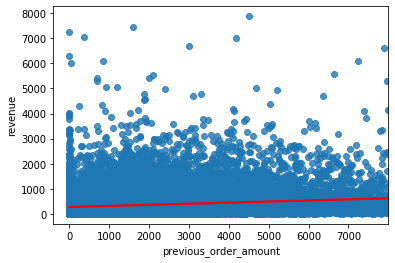

In [34]:
sns.regplot('previous_order_amount','revenue',red,line_kws={'color':'r'})

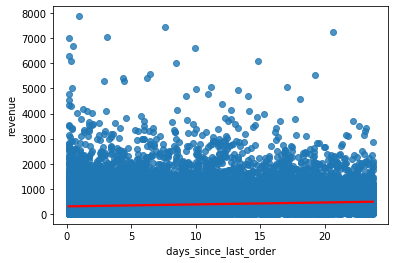

In [35]:
sns.regplot(' days_since_last_order ','revenue',red,line_kws={'color':'r'})

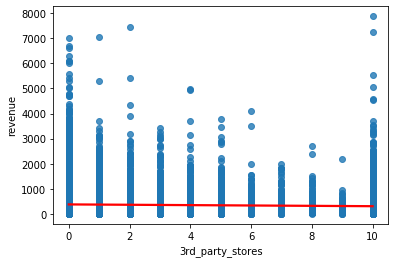

In [36]:
sns.regplot('3rd_party_stores','revenue',red,line_kws={'color':'r'})